MODEL 1: Brain tumor classification Without Data Augmentation

In [40]:
#Installing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
!pip install umap
!pip install tensorflow.keras
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
!pip install keras.utils.np_utils
from tensorflow.keras.utils import to_categorical
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras
ERROR: Could not find a version that satisfies the requirement keras.utils.np_utils (from versions: none)
ERROR: No matching distribution found for keras.utils.np_utils


In [1]:
# Import from drive

from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
#Listing the files in the directory
os.listdir('/content/drive/MyDrive/Tumor_1')

['no', 'yes']

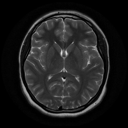

In [10]:
im =Image.open('/content/drive/MyDrive/Tumor_1/brain_tumor_dataset/no/1 no.jpeg').resize((128,128))
im

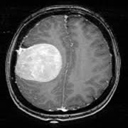

In [12]:
im =Image.open('/content/drive/MyDrive/Tumor_1/brain_tumor_dataset/yes/Y1.jpg').resize((128,128))
im

In [15]:
#Combining yes and no files and assigning as an array
yes=os.listdir('/content/drive/MyDrive/Tumor_1/brain_tumor_dataset/yes')
no=os.listdir('/content/drive/MyDrive/Tumor_1/brain_tumor_dataset/no')
data=np.concatenate([yes,no])

In [17]:
#Aligning 1 for yes files and 0 for no files
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
data

array(['Y77.jpg', 'Y66.JPG', 'Y117.JPG', 'Y161.JPG', 'Y98.JPG', 'Y39.jpg',
       'Y90.jpg', 'Y245.jpg', 'Y52.jpg', 'Y182.JPG', 'Y159.JPG',
       'Y153.jpg', 'Y255.JPG', 'Y29.jpg', 'Y254.jpg', 'Y165.JPG',
       'Y195.JPG', 'Y79.jpg', 'Y18.JPG', 'Y36.JPG', 'Y106.jpg',
       'Y101.jpg', 'Y40.JPG', 'Y81.jpg', 'Y194.jpg', 'Y166.JPG',
       'Y56.jpg', 'Y109.JPG', 'Y14.jpg', 'Y20.jpg', 'Y95.jpg', 'Y47.JPG',
       'Y74.jpg', 'Y108.jpg', 'Y25.jpg', 'Y168.jpg', 'Y62.jpg', 'Y32.jpg',
       'Y41.jpg', 'Y73.jpg', 'Y259.JPG', 'Y46.jpg', 'Y120.JPG', 'Y59.JPG',
       'Y112.JPG', 'Y243.JPG', 'Y251.JPG', 'Y97.JPG', 'Y147.JPG',
       'Y22.jpg', 'Y115.JPG', 'Y242.JPG', 'Y69.jpg', 'Y113.JPG', 'Y6.jpg',
       'Y105.jpg', 'Y26.jpg', 'Y49.JPG', 'Y34.jpg', 'Y256.JPG', 'Y16.JPG',
       'Y188.jpg', 'Y75.JPG', 'Y186.jpg', 'Y67.JPG', 'Y91.jpg', 'Y23.JPG',
       'Y114.JPG', 'Y35.jpg', 'Y184.JPG', 'Y167.JPG', 'Y8.jpg', 'Y58.JPG',
       'Y154.jpg', 'Y146.JPG', 'Y156.JPG', 'Y7.jpg', 'Y82.jpg', 'Y4.jpg',
 

In [19]:
yes_values=os.listdir('/content/drive/MyDrive/Tumor_1/brain_tumor_dataset/yes')
no_values=os.listdir('/content/drive/MyDrive/Tumor_1/brain_tumor_dataset/no')

In [30]:
#
X_data =[]
for file in yes_values:
    img = cv2.imread('/content/drive/MyDrive/Tumor_1/brain_tumor_dataset/yes'+file)
    #face = cv2.resize(img, (128, 128) )
    #(b, g, r)=cv2.split(face)
    #img=cv2.merge([r,g,b])
    X_data.append(img)

X_data =[]
for file in no_values:
    img = cv2.imread('/content/drive/MyDrive/Tumor_1/brain_tumor_dataset/no'+file)
    #face = cv2.resize(img, (128, 128) )
    #(b, g, r)=cv2.split(face)
    #img=cv2.merge([r,g,b])
    X_data.append(img)

In [ ]:
X.shape


(253, 32, 32, 3)

In [ ]:
# Normalizing data
X = X.astype('float32')
X /= 255

In [ ]:
# Splitting data into train and test sets
 (x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

In [ ]:
# The neural network model

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)  

In [ ]:
# Defining loss function
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [ ]:
# Running the model
model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

Train on 190 samples, validate on 63 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
190/190 [==============================] - 1s 7ms/sample - loss: 0.6482 - acc: 0.4316 - val_loss: 1.8161 - val_acc: 0.0000e+00
Epoch 2/150
190/190 [==============================] - 1s 3ms/sample - loss: 0.5339 - acc: 0.8158 - val_loss: 0.9960 - val_acc: 0.0000e+00
Epoch 3/150
190/190 [==============================] - 1s 3ms/sample - loss: 0.4784 - acc: 0.8158 - val_loss: 0.8274 - val_acc: 0.0000e+00
Epoch 4/150
190/190 [==============================] - 1s 4ms/sample - loss: 0.5064 - acc: 0.8158 - val_loss: 0.9084 - val_acc: 0.0000e+00
Epoch 5/150
190/190 [==============================] - 1s 4ms/sample - loss: 0.4589 - acc: 0.8158 - val_loss: 1.1866 - val_acc: 0.0000e+00
Epoch 6/150
190/190 [==============================] - 1s 3ms/sample - loss: 0.4479 - acc: 0.8158 - val_loss: 1.2361 - val_acc: 0.0000e+00
Epoch 7/150
190/190 [==============================] - 1s 3ms/sample - lo

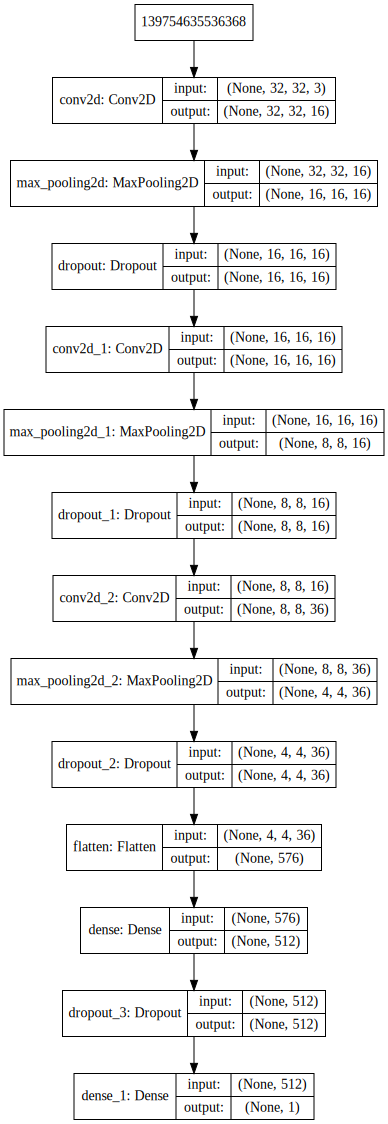

In [ ]:
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

In [ ]:
# Evaluating the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7619048


In [ ]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

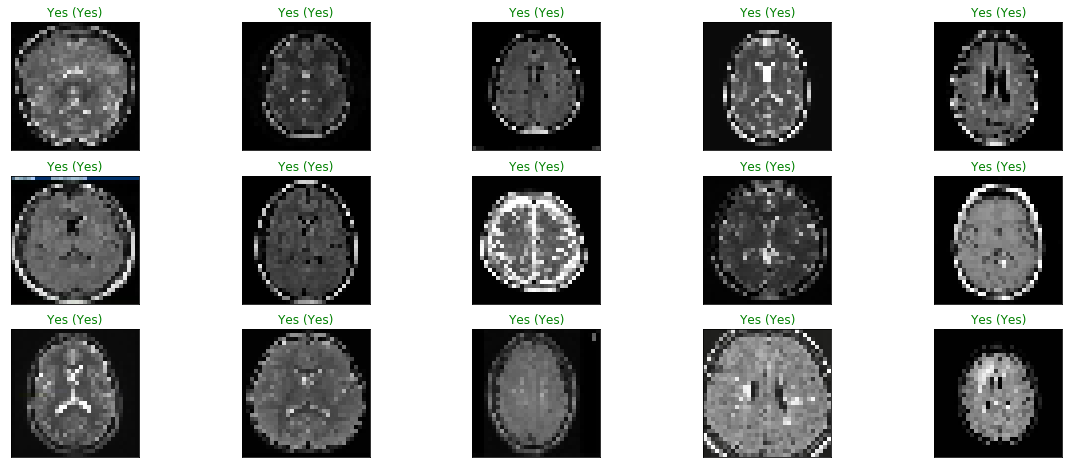

In [ ]:
# Evaluating the model prediction with detected images
y_hat = model.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    ax.set_title("{} ({})".format(labels[predict_index],
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()